In [2]:
# pip install scikit-learn

In [3]:
# Load data (SKIP this block if you don't need)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Must set path to the actual location of the data on local google drive
path = '/content/drive/MyDrive/6156_Project_Shared/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(path,sep=",",)
drive.flush_and_unmount()

Mounted at /content/drive


In [4]:
# Import necessary packages and modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, precision_recall_fscore_support
from sklearn.metrics import average_precision_score, classification_report

In [5]:
# Load the CSV file into a DataFrame
#data = 'diabetes.csv'
#df = pd.read_csv(data)

# Display the first few rows of the DataFrame to check its content
print(df.head())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [6]:
print(df.head())
print(df.info())
print(df.isnull().sum())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

<Axes: >

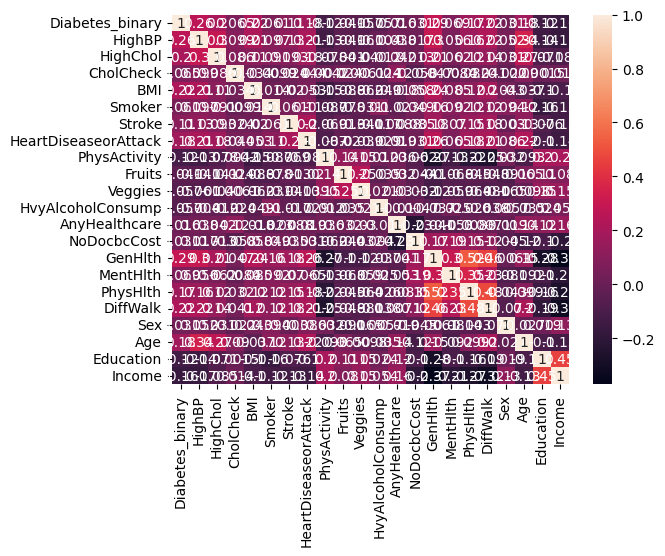

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)


In [8]:

# Assuming df is your dataframe
X = df.drop('Diabetes_binary', axis=1)  # Features (excluding the target)
y = df['Diabetes_binary']  # Target variable


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
clf = RandomForestClassifier(random_state=42)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
#from imblearn.over_sampling import SMOTE

# Assuming df is your dataframe
X = df.drop('Diabetes_binary', axis=1)  # Features (excluding the target)
y = df['Diabetes_binary']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest on the resampled data
clf = RandomForestClassifier(random_state=42)
#clf.fit(X_resampled, y_resampled)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8598628192999054
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



Threshold Tuning

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# from imblearn.over_sampling import SMOTE

# Assuming df is your dataframe
X = df.drop('Diabetes_binary', axis=1)  # Features (excluding the target)
y = df['Diabetes_binary']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest on the resampled data
clf = RandomForestClassifier(random_state=42)
#clf.fit(X_resampled, y_resampled)
clf.fit(X_train, y_train)

# Get predicted probabilities for class 1
y_probs = clf.predict_proba(X_test)[:, 1]

# Set the threshold (for example, 0.4)
threshold = 0.2

# Convert probabilities to binary predictions based on the threshold
y_pred_threshold = (y_probs >= threshold).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report
print(classification_report(y_test, y_pred_threshold))


Precision: 0.3187258944008512
Recall: 0.6850078605116479
F1-score: 0.4350351713183571
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.84     43739
         1.0       0.32      0.69      0.44      6997

    accuracy                           0.75     50736
   macro avg       0.63      0.73      0.64     50736
weighted avg       0.85      0.75      0.79     50736



Cross Validation and Grid Search

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df.drop('Diabetes_binary', axis=1)  # Features (excluding the target)
y = df['Diabetes_binary']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Create StratifiedKFold for cross-validation with 3 folds (instead of 5)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)

# Print evaluation metrics
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.60      0.09      0.16      7069

    accuracy                           0.86     50736
   macro avg       0.73      0.54      0.54     50736
weighted avg       0.83      0.86      0.82     50736



Accuracy: 0.779
Precision: 0.349
Recall: 0.676
F1 Score: 0.461
ROC AUC: 0.822


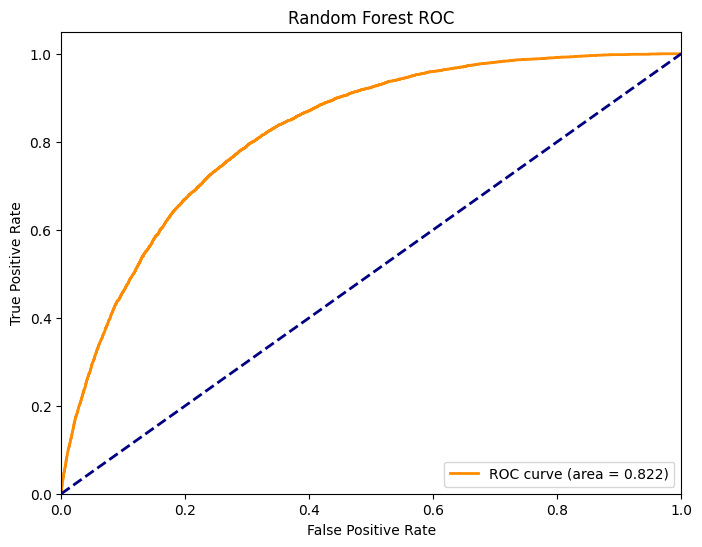

In [15]:
### Added graphs for ROC and Precision Recall with Threshold

# Best model ===> best_clf = grid_search.best_estimator_
y_pred1 = best_clf.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)

# Threshold
threshold = 0.2
y_pred1 = (best_clf.predict_proba(X_test)[:, 1] >= threshold).astype('float')
conf_matrix = confusion_matrix(y_test, y_pred1)

# Calculate ROC AUC
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Print the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')

# Add a circle at the threshold (THIS CODE IS WRONG)
#index = np.where(fpr >= (threshold))[0][0]
#plt.scatter(fpr[index], tpr[index], color='red', s=100, marker='o', label=f'Threshold = {threshold}')

plt.legend(loc="lower right")
plt.show()

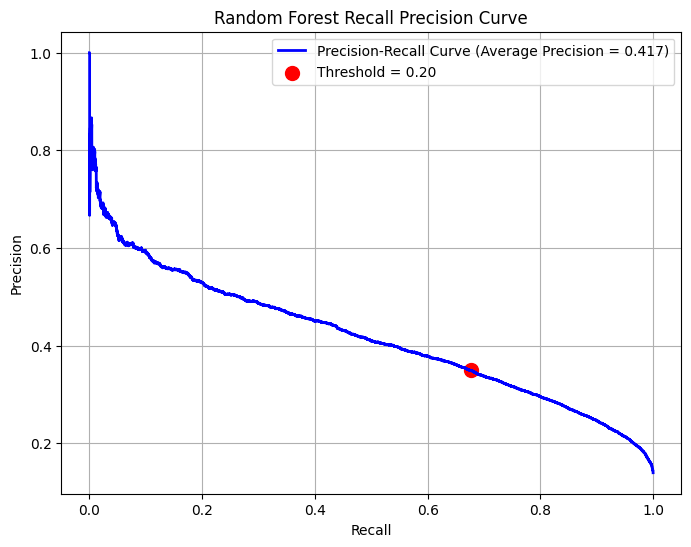

In [16]:
# Generate Precision Recall and Average Precision

# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate Average Precision
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall Curve with Average Precision in the Legend
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (Average Precision = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Recall Precision Curve')

# Add a circle at the threshold
# Find the index of the closest threshold value in the array
closest_threshold_index = np.argmin(np.abs(thresholds - threshold))
# Mark the threshold with a circle
plt.scatter(recall[closest_threshold_index], precision[closest_threshold_index], c='r', marker='o', s=100, label=f'Threshold = {thresholds[closest_threshold_index]:.2f}')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Features of Importance

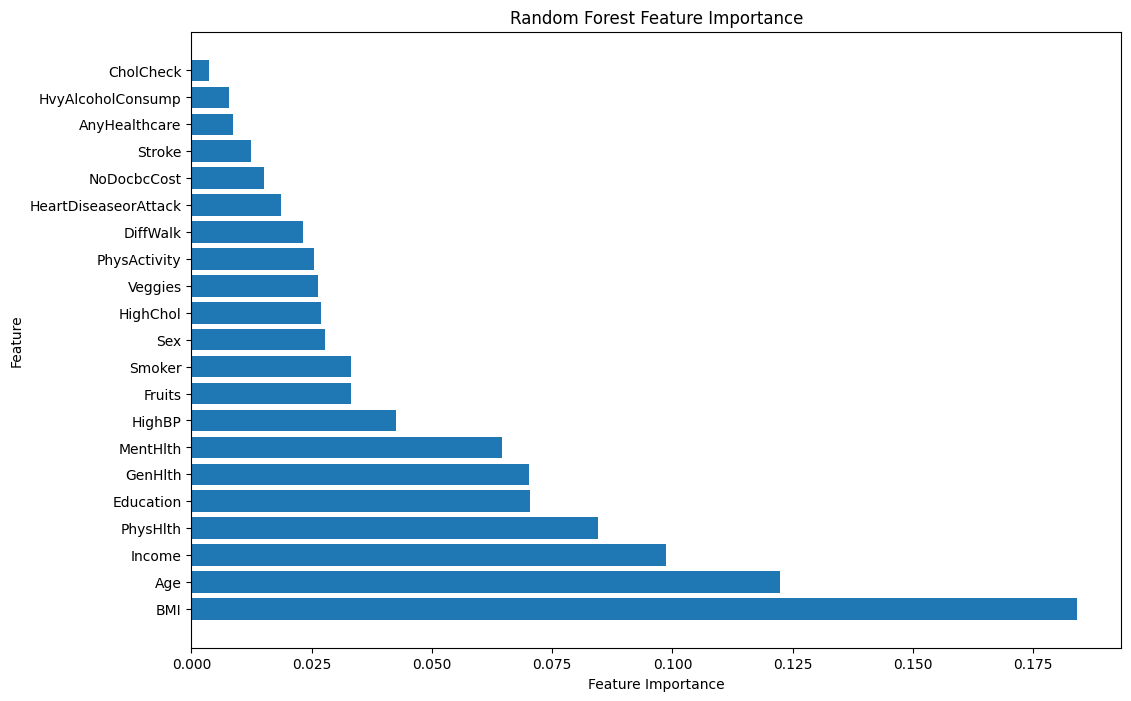

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df.drop('Diabetes_binary', axis=1)  # Features (excluding the target)
y = df['Diabetes_binary']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

